In [1]:
import pandas as pd
import numpy as np

In [2]:
filename = '../databases/RGI.csv'
df = pd.read_csv(filename)

In [3]:
for col in df.columns:
    df[col] = df[col].fillna(method='ffill')

In [25]:
df

,Código Hermes,Código Colciencias,Nombre del grupo,Lider colciencias,Lider Hermes,Integrantes Hermes,Integrantes Colciencias,Categoría (Conv 693 de Colciencias 2014),Categoría (Conv 737 de Colciencias 2015),Categoría (Conv 781 de Colciencias 2017),...,Mes,Lineas de Investigación,Area_Conocimiento_OCDE,Area_OCDE,Agenda del Conocimiento,Sede,Facultad,Departamento,Correo,Sedes_Int
0,615.0,COL0007909,CONTROL Y PROCESAMIENTO DIGITAL DE SEÑALES,CASTELLANOS DOMINGUEZ CESAR GERMAN,CASTELLANOS DOMINGUEZ CESAR GERMAN,ALBERTO SEPULVEDA GIRALDO,https://scienti.minciencias.gov.co/gruplac/jsp...,A1,A1,A1,...,8.0,ANALISIS DE SENALES BIOELECTRICAS\nAPRENDIZAJE...,"Ingenierías Eléctrica, Electrónica e Informática",Ingeniería y Tecnología,Tecnologías de la Información y Comunicaciones,MANIZALES,4- FACULTAD DE INGENIERÍA Y ARQUITECTURA,"4- DEPARTAMENTO DE INGENIERÍA ELÉCTRICA, ELECT...",cgcastellanosd@unal.edu.co,"Bogotá, Manizales."
1,615.0,COL0007909,CONTROL Y PROCESAMIENTO DIGITAL DE SEÑALES,CASTELLANOS DOMINGUEZ CESAR GERMAN,CASTELLANOS DOMINGUEZ CESAR GERMAN,ALEJANDRO GIRALDO ORTIZ,https://scienti.minciencias.gov.co/gruplac/jsp...,A1,A1,A1,...,8.0,ANALISIS DE SENALES BIOELECTRICAS\nAPRENDIZAJE...,"Ingenierías Eléctrica, Electrónica e Informática",Ingeniería y Tecnología,Tecnologías de la Información y Comunicaciones,MANIZALES,4- FACULTAD DE INGENIERÍA Y ARQUITECTURA,"4- DEPARTAMENTO DE INGENIERÍA ELÉCTRICA, ELECT...",cgcastellanosd@unal.edu.co,"Bogotá, Manizales."
2,615.0,COL0007909,CONTROL Y PROCESAMIENTO DIGITAL DE SEÑALES,CASTELLANOS DOMINGUEZ CESAR GERMAN,CASTELLANOS DOMINGUEZ CESAR GERMAN,ANDERSON ALBERTO RUALES TORRES,https://scienti.minciencias.gov.co/gruplac/jsp...,A1,A1,A1,...,8.0,ANALISIS DE SENALES BIOELECTRICAS\nAPRENDIZAJE...,"Ingenierías Eléctrica, Electrónica e Informática",Ingeniería y Tecnología,Tecnologías de la Información y Comunicaciones,MANIZALES,4- FACULTAD DE INGENIERÍA Y ARQUITECTURA,"4- DEPARTAMENTO DE INGENIERÍA ELÉCTRICA, ELECT...",cgcastellanosd@unal.edu.co,"Bogotá, Manizales."
3,615.0,COL0007909,CONTROL Y PROCESAMIENTO DIGITAL DE SEÑALES,CASTELLANOS DOMINGUEZ CESAR GERMAN,CASTELLANOS DOMINGUEZ CESAR GERMAN,ANDRES DAVID TOBAR RODRIGUEZ,https://scienti.minciencias.gov.co/gruplac/jsp...,A1,A1,A1,...,8.0,ANALISIS DE SENALES BIOELECTRICAS\nAPRENDIZAJE...,"Ingenierías Eléctrica, Electrónica e Informática",Ingeniería y Tecnología,Tecnologías de la Información y Comunicaciones,MANIZALES,4- FACULTAD DE INGENIERÍA Y ARQUITECTURA,"4- DEPARTAMENTO DE INGENIERÍA ELÉCTRICA, ELECT...",cgcastellanosd@unal.edu.co,"Bogotá, Manizales."
4,615.0,COL0007909,CONTROL Y PROCESAMIENTO DIGITAL DE SEÑALES,CASTELLANOS DOMINGUEZ CESAR GERMAN,CASTELLANOS DOMINGUEZ CESAR GERMAN,ANDRES EDUARDO CASTRO OSPINA,https://scienti.minciencias.gov.co/gruplac/jsp...,A1,A1,A1,...,8.0,ANALISIS DE SENALES BIOELECTRICAS\nAPRENDIZAJE...,"Ingenierías Eléctrica, Electrónica e Informática",Ingeniería y Tecnología,Tecnologías de la Información y Comunicaciones,MANIZALES,4- FACULTAD DE INGENIERÍA Y ARQUITECTURA,"4- DEPARTAMENTO DE INGENIERÍA ELÉCTRICA, ELECT...",cgcastellanosd@unal.edu.co,"Bogotá, Manizales."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,36.0,COL2515,GESTIÓN DE LA INFRAESTRUCTURA DE TRANSPORTE Y ...,LUIS RICARDO VASQUEZ VARELA,LUIS RICARDO VASQUEZ VARELA,YESENIA FLOREZ CARDENAS,https://scienti.colciencias.gov.co/gruplac/jsp...,A,Registrados,A,...,2.0,INFRAESTRUCTURA DEL TRANSPORTE\nMATERIALES Y P...,Ingeniería Civil,Ingeniería y Tecnología,"Hábitat, Ciudad y Territorio",MANIZALES,4- FACULTAD DE INGENIERÍA Y ARQUITECTURA,4- DEPARTAMENTO DE INGENIERÍA CIVIL,lrvasquezv@unal.edu.co,Manizales
361,36.0,COL2515,GESTIÓN DE LA INFRAESTRUCTURA DE TRANSPORTE Y ...,LUIS RICARDO VASQUEZ VARELA,LUIS RICARDO VASQUEZ VARELA,YESENIA FLOREZ CARDENAS,https://scienti.colciencias.gov.co/gruplac/jsp...,A,Registrados,A,...,2.0,INFRAESTRUCTURA DEL TRANSPORTE\nMATERIALES Y P...,Ingeniería Civil,Ingeniería y Tecnología,"Hábita

In [4]:
ids = np.unique(df['Nombre del grupo'].tolist())
ids

array(['ARQUITECTURA MEDIO AMBIENTE Y SOSTENIBILIDAD',
       'ARQUITECTURA Y CIUDAD: CIENCIA Y CULTURA',
       'ARQUITECTURA, CIUDAD Y TERRITORIO',
       'ARQUITECTURA, MEDIOS DE REPRESENTACIÓN Y COMUNICACIÓN',
       'COMPUTACION APLICADA SUAVE Y DURA SHAC',
       'CONTROL Y PROCESAMIENTO DIGITAL DE SEÑALES',
       'CULTURA ORGANIZACIONAL Y GESTION HUMANA',
       'ENVIRONMENTAL ENERGY AND EDUCATION POLICY E3P',
       'ETICA EMPRESARIAL Y EMPRESARIADO SOCIAL ETHOS',
       'GESTIÓN DE LA INFRAESTRUCTURA DE TRANSPORTE Y DEL ESPACIO PÚBLICO',
       'GESTIÓN DEL CONOCIMIENTO E-BUSINESS',
       'GIPEM GRUPO DE INVESTIGACION EN POTENCIA ENERGIA Y MERCADOS',
       'GRUPO DE FISICOQUIMICA COMPUTACIONAL',
       'GRUPO DE INVESTIGACION EN APLICACION DE NUEVAS TECNOLOGIAS',
       'GRUPO DE INVESTIGACION EN APROVECHAMIENTO DE RESIDUOS',
       'GRUPO DE INVESTIGACION EN CALIDAD DE LA ENERGIA Y ELECTRONICA DE POTENCIA',
       'GRUPO DE INVESTIGACION EN PROCESOS REACTIVOS INTENSIFICADO

In [5]:
get_name = lambda df,g:df[df['Nombre del grupo'] == g]['Nombre del grupo'].tolist()[0]
get_members = lambda df,g:df[df['Nombre del grupo'] == g]
get_line = lambda df,g:df[df['Nombre del grupo'] == g]['Lineas de Investigación'].tolist()[0]
get_OCDE = lambda df,g:df[df['Nombre del grupo'] == g]['Area_Conocimiento_OCDE'].tolist()[0]
get_OCDE2 = lambda df,g:df[df['Nombre del grupo'] == g]['Area_OCDE'].tolist()[0]
get_know = lambda df,g:df[df['Nombre del grupo'] == g]['Agenda del Conocimiento'].tolist()[0]




In [6]:
groups = {}
for group in ids:
    groups.setdefault('members', []).append(len(get_members(df, group)))
    groups.setdefault('name', []).append(get_name(df, group).capitalize())
    groups.setdefault('line', []).append(get_line(df, group).capitalize())
    groups.setdefault('ocde', []).append(get_OCDE(df, group).capitalize())
    groups.setdefault('ocde2', []).append(get_OCDE2(df, group).capitalize())
    groups.setdefault('knowledge', []).append(get_know(df, group).capitalize())

groups = pd.DataFrame.from_dict(groups)
groups.head()

,members,name,line,ocde,ocde2,knowledge
0,4,Arquitectura medio ambiente y sostenibilidad,Construccion sostenible con materiales alterna...,Ciencias de la tierra y medioambientales,Ciencias naturales,Ambiente y biodiversidad
1,1,Arquitectura y ciudad: ciencia y cultura,Riesgo urbano\narquitectura y cultura\narquite...,Humanidades,Arte,Arte y cultura
2,1,"Arquitectura, ciudad y territorio",Arquitectura moderna\nproyectos arquitectonicos,Humanidades,Arte,Arte y cultura
3,9,"Arquitectura, medios de representación y comun...",Arte cultura y sociedad\nciudad territorio y a...,Arte,Humanidades,"Hábitat, ciudad y territorio"
4,8,Computacion aplicada suave y dura shac,"Tratamiento, modelado y visualizacion de datos...","Ingenierías eléctrica, electrónica e informática",Ingeniería y tecnología,Tecnologías de la información y comunicaciones


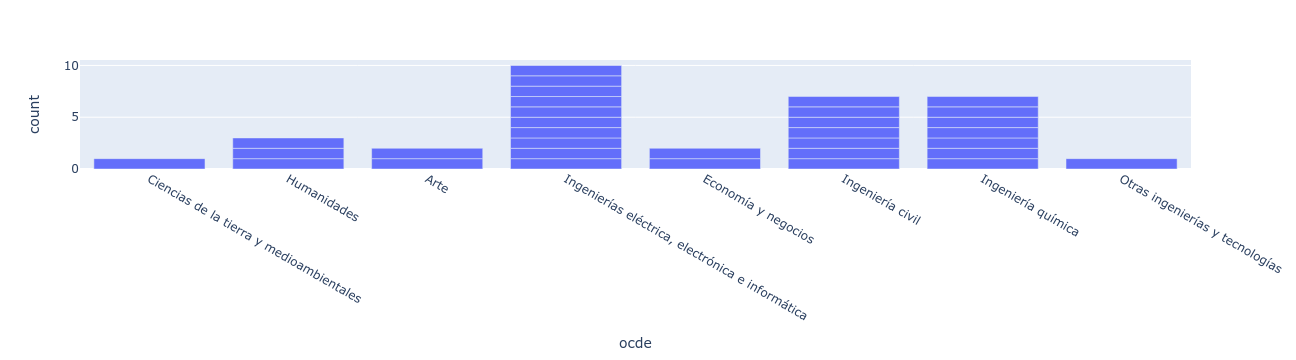

In [107]:
fig = px.bar(groups, x='ocde')
fig.show()

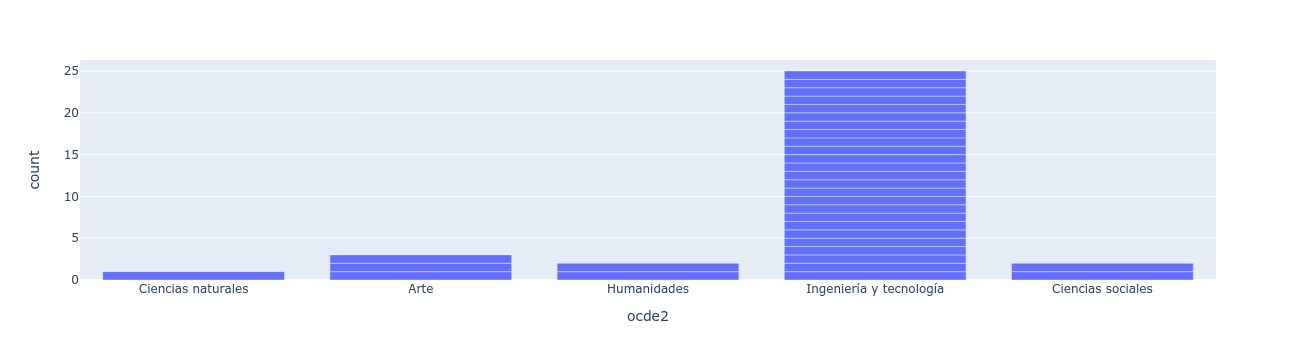

In [111]:
fig = px.bar(groups, x='ocde2')
fig.show()

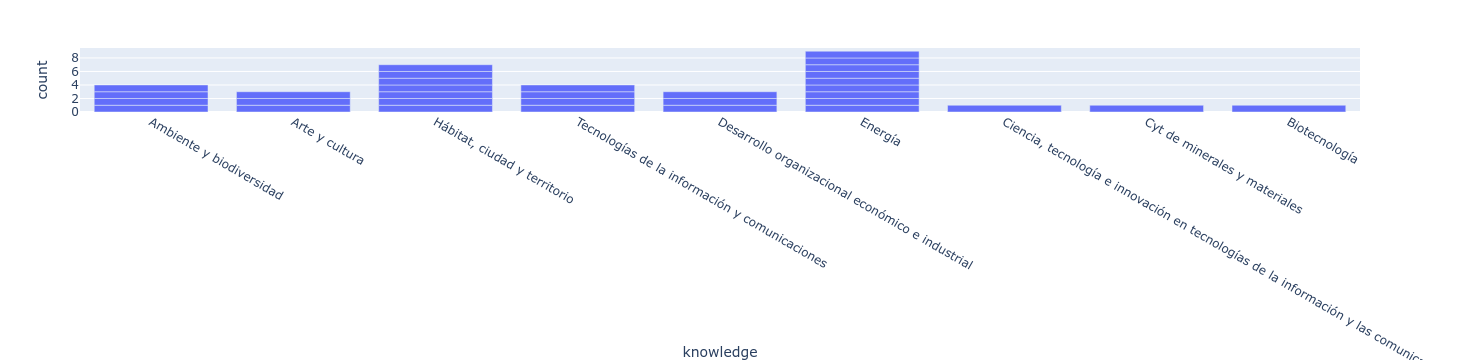

In [115]:
fig = px.bar(groups, x='knowledge')
fig.show()

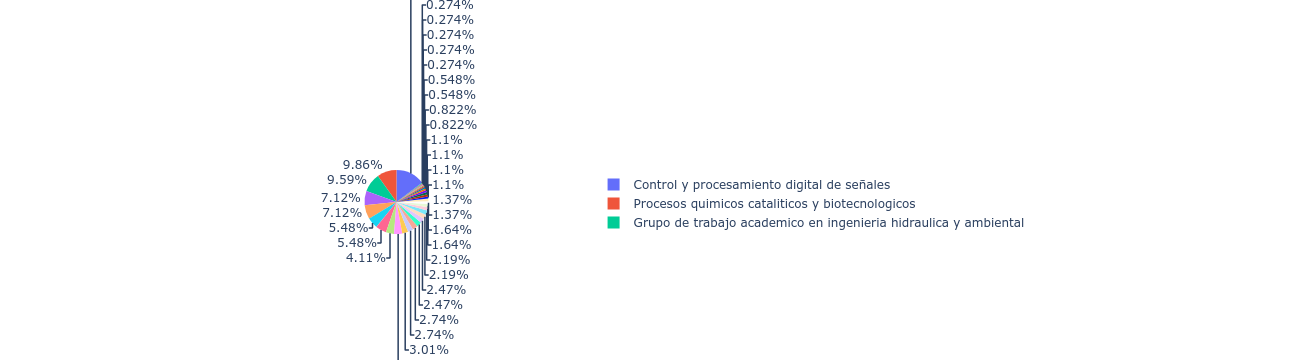

In [104]:
fig = px.pie(groups, values='members', names='name')
fig.show()

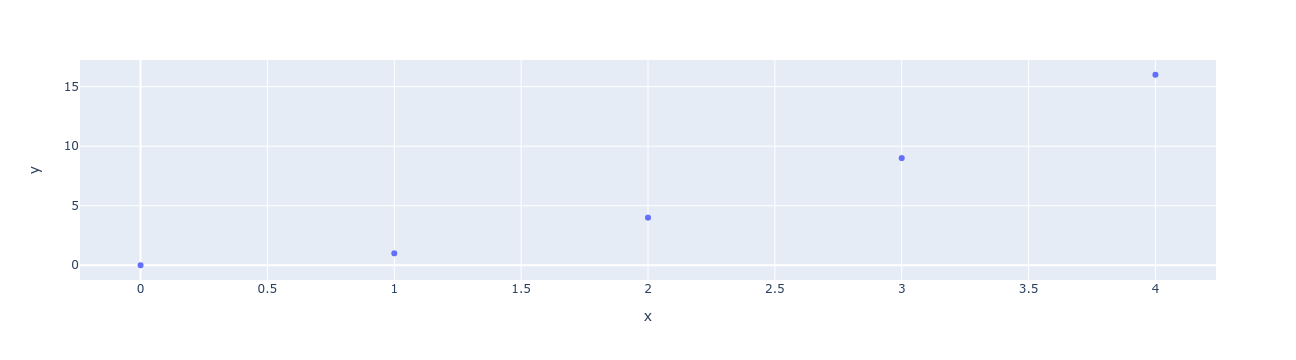

In [105]:
fig = px.scatter(x=[0, 1, 2, 3, 4], y=[0, 1, 4, 9, 16])
fig.show()